# REPORT EXPLORATORY DATA ANALYSIS PLOTS

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path
plt.style.use('seaborn-v0_8-ticks')
cwd = str(Path().resolve().parent)
sys.path.append(cwd)
from utils.data_preparation import preprocess_data, split_data
print(cwd)

C:\Users\xkorpijo3\OneDrive - Fortum\Desktop\Master-thesis-GBRT-dam


In [2]:
os.getcwd()

'c:\\Users\\xkorpijo3\\OneDrive - Fortum\\Desktop\\Master-thesis-GBRT-dam\\visualization'

In [3]:
os.chdir(cwd)

In [4]:
features = ['h_poly', 'h', 'GV1', 'GV3', 'GV51', 'MB4', 'MB8', 'MB10', 'MB18', \
            'P', 'T', 't', 'ln_t', 'Cos_s', 'Sin_s', 'Cos_2s', 'Sin_2s', 'month', 'year', \
            'h_MA_007', 'h_MA_014', 'h_MA_060', 'h_MA_180', 'h_RC_007', 'h_RC_030', 'T_MA_001', 'T_MA_007', \
            'P_RS_030', 'P_RS_060', 'P_RS_090', 'P_RS_180']
target = 'h'
poly_degree = 4
start_date = "08-01-2020"
end_date = "03-01-2025"
test_size = 0.3

X, y, dates = preprocess_data(features, target, start_date, end_date, poly_degree=poly_degree, test_size=test_size)

X_train, X_test, y_train, y_test, split_index = split_data(X, y, test_size=test_size)
X_all = pd.concat([X_train, X_test])

In [5]:
print(X_train)

          Sin_s     Cos_s    Sin_2s    Cos_2s     t      ln_t  month  year  \
0     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
1     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
2     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
3     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
4     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
...         ...       ...       ...       ...   ...       ...    ...   ...   
28102 -0.970064  0.242850 -0.471160 -0.882048  1171  7.065613     10  2023   
28103 -0.970064  0.242850 -0.471160 -0.882048  1171  7.065613     10  2023   
28104 -0.965740  0.259512 -0.501242 -0.865307  1172  7.066467     10  2023   
28105 -0.965740  0.259512 -0.501242 -0.865307  1172  7.066467     10  2023   
28106 -0.965740  0.259512 -0.501242 -0.865307  1172  7.066467     10  2023   

       h_poly_1     h_poly_2  ...    h_MA_060    h_MA_180  h_RC

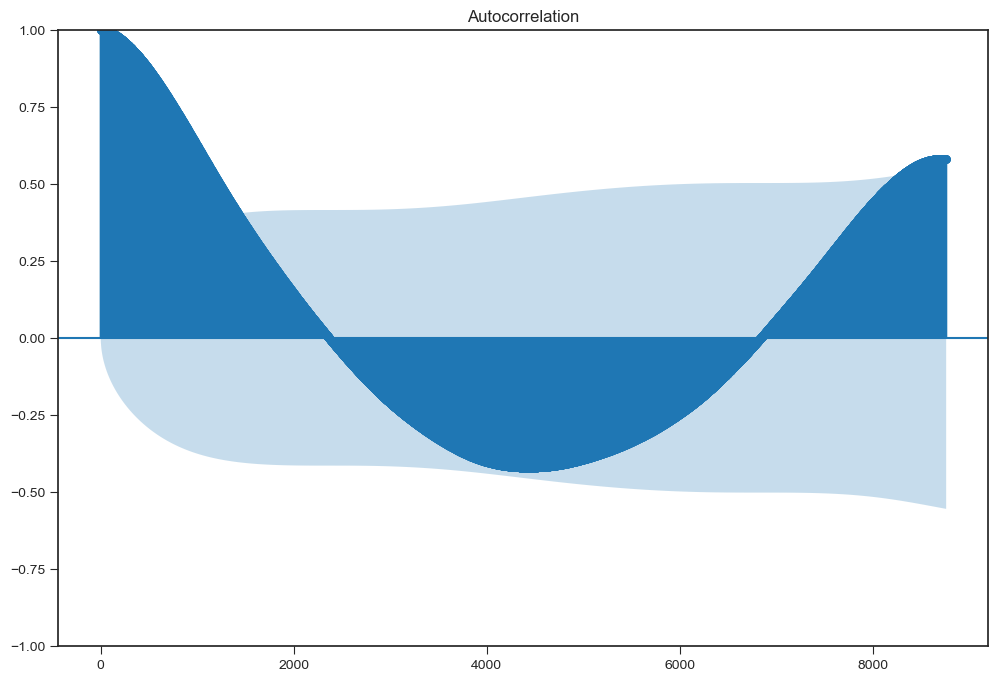

In [36]:
# Plot the ACF for the resampled data
fig, ax = plt.subplots(figsize=(12, 8))
plot_acf(X_all['h'], ax=ax, lags=8760)  # Use a smaller number of lags for daily data
plt.show()

<Figure size 640x480 with 0 Axes>

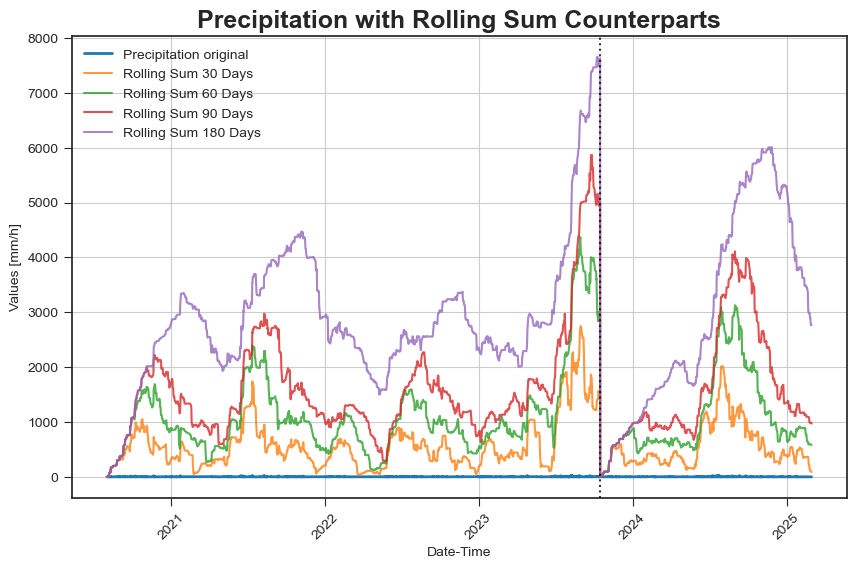

In [24]:
# Plotting all precipitation data
plt.clf()
plt.figure(figsize=(10, 6))

# Adding labels and title
plt.title('Precipitation with Rolling Sum Counterparts', fontsize=18, fontweight='bold')
plt.plot(dates, X_all['P'], label='Precipitation original', linewidth=2)
plt.plot(dates, X_all['P_RS_030'], label='Rolling Sum 30 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_060'], label='Rolling Sum 60 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_090'], label='Rolling Sum 90 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_180'], label='Rolling Sum 180 Days', alpha=.8)
plt.axvline(x=dates.iloc[split_index], color='black', alpha=0.8, linestyle=':')
plt.xlabel('Date-Time')
plt.ylabel('Values [mm/h]')

# Show plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)  
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

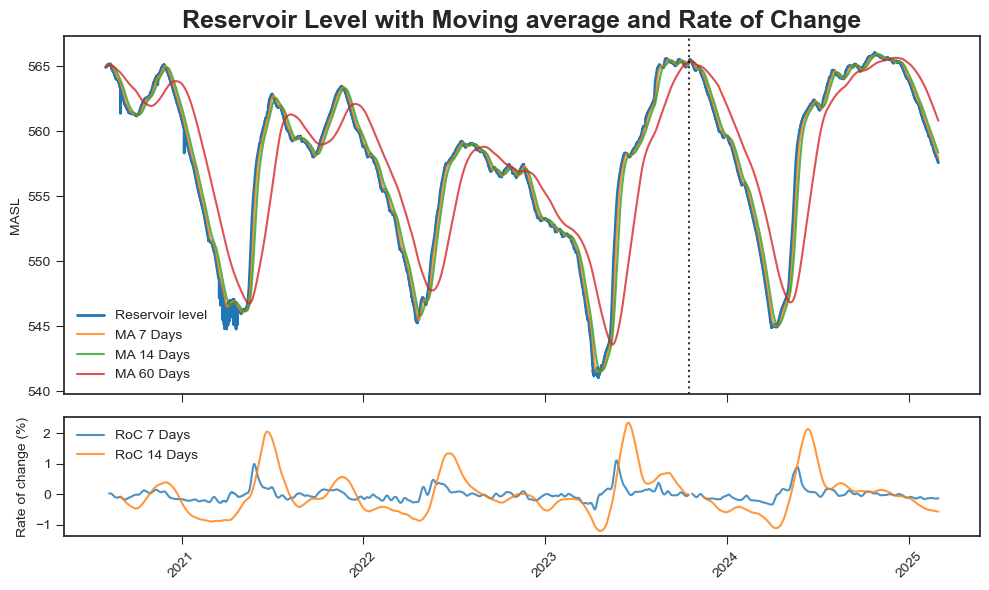

In [38]:
# Plotting all reservoir data
plt.clf()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)  

# Adding labels and title
ax1.set_title('Reservoir Level with Moving average and Rate of Change', fontsize=18, fontweight='bold')
ax1.plot(dates, X_all['h'], label='Reservoir level', linewidth=2)
ax1.plot(dates, X_all['h_MA_007'], label='MA 7 Days', alpha=.8)
ax1.plot(dates, X_all['h_MA_014'], label='MA 14 Days', alpha=.8)
ax1.plot(dates, X_all['h_MA_060'], label='MA 60 Days', alpha=.8)
# ax1.plot(dates, X_all['h_MA_180'], label='MA 180 Days', alpha=.8)
ax1.axvline(x=dates.iloc[split_index], color='black', alpha=0.8, linestyle=':')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('MASL')
ax1.legend(loc='lower left')
ax1.grid(False)

ax2.plot(dates, X_all['h_RC_007'], label='RoC 7 Days', alpha=.8)
ax2.plot(dates, X_all['h_RC_030'], label='RoC 14 Days', alpha=.8)
ax2.set_ylabel('Rate of change (%)')
ax2.grid(True)
ax2.legend(loc='upper left')

# Show plot
plt.xticks(rotation=45)  
fig.tight_layout()  

plt.grid()
plt.show()

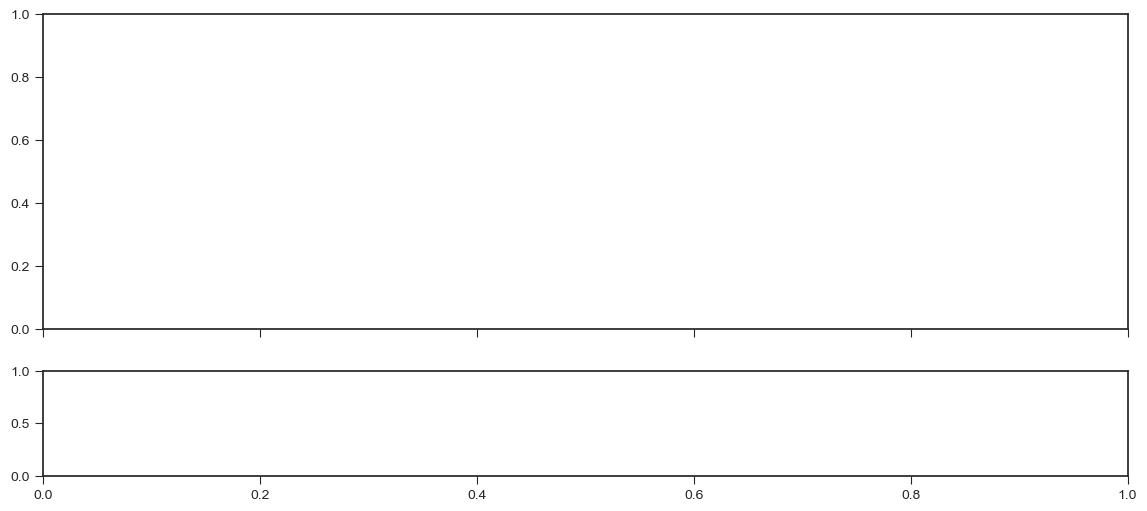

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)  
plt.show()